In [3]:
import MDAnalysis as mda
from MDAnalysis import transformations


/home/jaybraun/miniconda3/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [4]:
u = mda.Universe('testing/test.tpr', 'testing/test2.xtc')

In [5]:
ag = u.select_atoms('all')  # Replace with your phospholipid residues

In [6]:
ag

<AtomGroup with 234467 atoms>

In [7]:
ag=u.atoms

In [10]:

# phospholipids = u.select_atoms('resname POPC DOPE SAPI')  # Replace with your phospholipid residues

# Make sure your system is whole at least at first frame
ag.unwrap(compound='residues')

# Now create a new trajectory where phospholipids are unwrapped
with mda.Writer("testing/unwrapped_trajectory.xtc", ag.n_atoms) as W:
    for ts in u.trajectory:
        ag.unwrap(compound='residues')
        W.write(ag)

In [17]:
from MDAnalysis import transformations

/home/jaybraun/miniconda3/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [20]:
ag = u.atoms
transform = transformations.unwrap(ag)
print(transform)
u.trajectory.add_transformations(transform)

ValueError: Can't add transformations again. Please create a new Universe object

In [12]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

5.4804831299181435e-05
Lateral diffusion coefficient: 5.480483129918144e-10


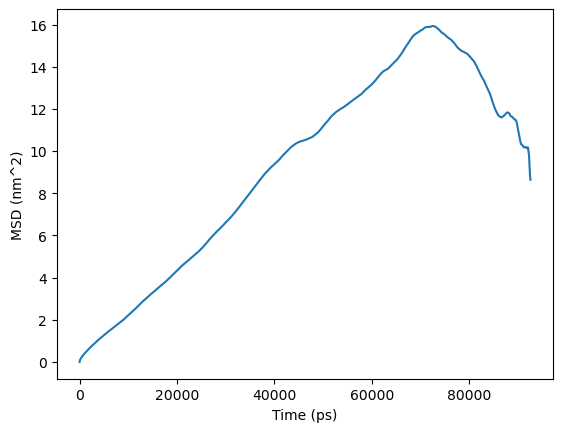

In [34]:
data = np.loadtxt('testing/msd.xvg', comments=['@', '#'])
time = data[:, 0]
msd = data[:, 1]
# print(time)
# calculate diffusion coefficient
D = np.mean(msd[time > 100] / (4 * (time[time > 100] - 100)))
print(D)

# print diffusion coefficient in cm^2/s
print("Lateral diffusion coefficient:", D * 1e-5)

# plot msd vs time
plt.plot(time, msd)
plt.xlabel('Time (ps)')
plt.ylabel('MSD (nm^2)')
plt.show()

Lateral diffusion coefficient: 3697.028424677014 cm^2/s


ValueError: x and y must have same first dimension, but have shapes (1,) and (927,)

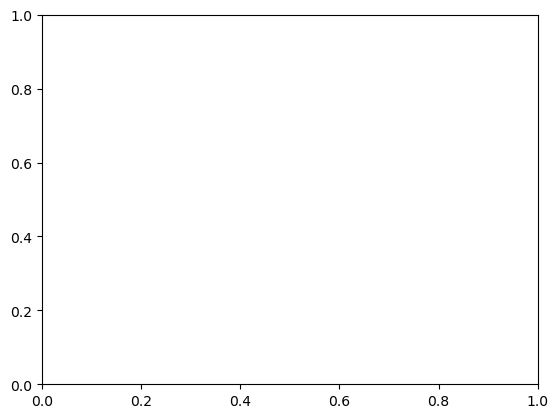

In [32]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the Universe from the topology and trajectory files
u = mda.Universe('testing/test.tpr', 'testing/nojump.xtc')

# Select the group of lipids
lipids = u.select_atoms('resname POPC')

# Initialize an array to store the initial positions of the lipids
initial_positions = lipids.positions.copy()

# Initialize an array to store the mean squared displacements
msd = np.zeros(len(u.trajectory))

# Loop over the trajectory
for i, ts in enumerate(u.trajectory):
    # Calculate the displacements
    displacements = lipids.positions - initial_positions

    # Project the displacements onto the x-y plane
    displacements[:, 2] = 0

    # Calculate the squared displacements
    squared_displacements = np.sum(displacements**2, axis=1)

    # Calculate the mean squared displacement
    msd[i] = np.mean(squared_displacements)

# Calculate the diffusion coefficient (in nm^2/ps)
D = np.mean(msd[1:] / (2 * u.trajectory.dt * np.arange(1, len(msd))))

# Convert from nm^2/ps to cm^2/s
D *= 1e5

# Print the diffusion coefficient
print('Lateral diffusion coefficient:', D, 'cm^2/s')

# Plot the mean squared displacement as a function of time
plt.plot(u.trajectory.time, msd)
plt.xlabel('Time (ps)')
plt.ylabel('MSD (nm^2)')
plt.show()
